In [2]:
from Compeletion3D import Completion3D
from torch_geometric.data import DataLoader
import numpy as np
import matplotlib.pylab  as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
path = '../data/Completion3D/'
dataset = Completion3D(path, split='train',categories='Airplane')


In [4]:
def plot_3d_point_cloud(x, y, z, show=True, show_axis=True, in_u_sphere=False, marker='.', s=8, alpha=.8, figsize=(15, 7), elev=20, azim=240, axis=None, title=None, *args, **kwargs):

    if axis is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')        
    else:
        ax = axis
        fig = axis

    if title is not None:
        plt.title(title)

    sc = ax.scatter(x, y, z, marker=marker, s=s, alpha=alpha, *args, **kwargs)
    ax.view_init(elev=elev, azim=azim)

    if in_u_sphere:
        ax.set_xlim3d(-0.5, 0.5)
        ax.set_ylim3d(-0.5, 0.5)
        ax.set_zlim3d(-0.5, 0.5)
    else:
        miv = 0.7 * np.min([np.min(x), np.min(y), np.min(z)])  # Multiply with 0.7 to squeeze free-space.
        mav = 0.7 * np.max([np.max(x), np.max(y), np.max(z)])
        ax.set_xlim(miv, mav)
        ax.set_ylim(miv, mav)
        ax.set_zlim(miv, mav)
        plt.tight_layout()

    if not show_axis:
        plt.axis('off')

    if 'c' in kwargs:
        plt.colorbar(sc)

    if show:
        plt.show()

    return fig

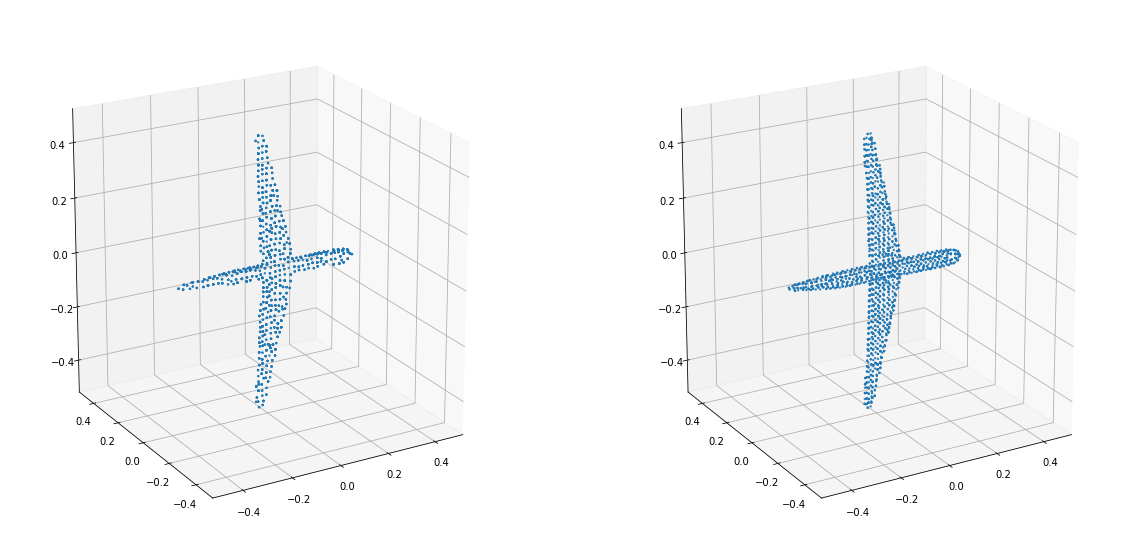

In [7]:
fig = plt.figure(figsize=(20,10))
ax_pred = fig.add_subplot(121, projection='3d')
ax_true = fig.add_subplot(122, projection='3d')
num = 90
plot_3d_point_cloud(dataset[num].pos[:,0], 
                    dataset[num].pos[:,1], 
                    dataset[num].pos[:,2], in_u_sphere=True,axis=ax_pred,show=False);
plot_3d_point_cloud(dataset[num].y[:,0], 
                    dataset[num].y[:,1], 
                    dataset[num].y[:,2], in_u_sphere=True,axis=ax_true,show=False);